# 문제풀이 Overview
이번 문제풀이에서는 총 3개의 문제와 1개의 자유주제를 다룹니다.    
문제를 본격적으로 풀기 전에 아래 코드를 실행해 pandas 라이브러리를 임포트하고 데이터를 읽어와주세요.



In [ ]:
import pandas as pd

In [ ]:
kor_team = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/volleyball_olympics2020_20210731/kor_team_rosters.csv')
jpn_team = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/volleyball_olympics2020_20210731/jpn_team_rosters.csv')
set5_play = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/volleyball_olympics2020_20210731/jpn-kor_set5_play.csv')

# 데이터 설명

섹션2 문제풀이에서 다뤘던 2020 도쿄 하계올림픽 여자배구 데이터를 기억하시나요?    
한국 팀 프로필 데이터 `kor_team`을 이번 섹션에서 다시 만납니다.    
`jpn_team`은 `kor_team`과 동일한 구조의 일본 팀 프로필 데이터입니다.

**컬럼 상세**

- player_no: 선수 유니폼 번호 (선수가 아닌 경우 null)
- player_name: 이름
- shirt_name: 선수 유니폼에 명시된 이름 (선수가 아닌 경우 null)
- position: 포지션
- hand: 사용하는 손 (선수가 아닌 경우 null)
- height: 신장 cm (선수가 아닌 경우 null)
- highest_reach_spike: 스파이크 높이 최고 기록 cm (선수가 아닌 경우 null)
- highest_reach_block: 블로킹 높이 최고 기록 cm (선수가 아닌 경우 null)
- date_of_birth: 선수 생년월일 (선수가 아닌 경우 null)

`set5_play`는 2020 도쿄 하계올림픽의 여자배구 경기 중 2021-07-31에 진행된 한일전의 마지막 세트인 5세트의 경기 기록 데이터입니다.

**컬럼 상세**
- rally: 랠리 (양편의 타구가 계속 이어지는 시간의 단위)
- point_team: 해당 랠리에서 득점을 한 팀
- action_team: 득점을 결정지은 액션을 한 팀
- player_no: 득점을 결정지은 액션을 한 선수의 유니폼 번호
- action: 득점을 결정지은 액션의 종류
- point_error: action의 성공(point) 또는 실패(error)
    - 성공(point)일 때, action_team(액션 팀)과 point_team(득점 팀)은 동일합니다.
    - 실패(error)일 때, 상대 팀이 득점하게 되므로 action_team(액션 팀)과 point_team(득점 팀)은 서로 다릅니다.

**경기 상황에 따른 컬럼 값**
- 랠리 176(첫번째 행): 한국 팀(action_team)의 14번 선수(player_no)가 스파이크(action)를 성공(point_error)해서, 한국 팀(point_team)이 득점합니다.
- 랠리 177(두번째 행): 한국 팀(action_team)의 11번 선수(player_no)가 서브(action)를 실패(point_error)해서, 일본 팀(point_team)이 득점합니다.

In [ ]:
set5_play[set5_play['rally'].isin([176, 177])]

,rally,point_team,action_team,player_no,action,point_error
0,176,kor,kor,14,spike,point
1,177,jpn,kor,11,serve,error


# 데이터 미리보기

In [ ]:
jpn_team.head()

,player_no,player_name,shirt_name,position,hand,height,highest_reach_spike,highest_reach_block,date_of_birth
0,1.0,KUROGO Ai,KUROGO,Outside Hitter,Right,180.0,306.0,295.0,1998-06-14
1,2.0,KOGA Sarina,KOGA,Outside Hitter,Right,180.0,307.0,290.0,1996-05-21
2,3.0,TASHIRO Kanami,TASHIRO,Setter,Right,173.0,289.0,273.0,1991-03-25
3,4.0,ISHIKAWA Mayu,ISHIKAWA,Outside Hitter,Right,173.0,300.0,290.0,2000-05-14
4,5.0,SHIMAMURA Haruyo,SHIMAMURA,Middle Blocker,Right,182.0,297.0,290.0,1992-03-04


In [ ]:
set5_play.head()

,rally,point_team,action_team,player_no,action,point_error
0,176,kor,kor,14,spike,point
1,177,jpn,kor,11,serve,error
2,178,kor,kor,10,spike,point
3,179,jpn,jpn,2,spike,point
4,180,kor,kor,10,spike,point


## **데이터셋 기본 정보 파악**

- 데이터셋의 크기와 구조 확인

In [ ]:
# 데이터프레임의 크기 확인 (행과 열 수)
set5_play.shape

(30, 6)

In [ ]:
# 데이터프레임의 구조 확인 (열 이름 및 데이터 유형)
set5_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rally        30 non-null     int64 
 1   point_team   30 non-null     object
 2   action_team  30 non-null     object
 3   player_no    30 non-null     int64 
 4   action       30 non-null     object
 5   point_error  30 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.5+ KB


- 결측치 확인

In [ ]:
# 각 열에 결측치가 있는지 확인
set5_play.isnull().sum()

rally          0
point_team     0
action_team    0
player_no      0
action         0
point_error    0
dtype: int64

- 기술 통계

In [ ]:
# 숫자형 열에 대한 기술 통계 정보 확인
set5_play.describe()

,rally,player_no
count,30.000000,30.000000
mean,190.500000,7.733333
std,8.803408,4.432897
min,176.000000,2.000000
25%,183.250000,4.000000
50%,190.500000,10.000000
75%,197.750000,11.000000
max,205.000000,14.000000


- 범주형 열의 고유값 확인


In [ ]:
# 범주형 열의 고유값 확인
set5_play['point_team'].unique()  # 예시: 'point_team' 열의 고유값 확인

array(['kor', 'jpn'], dtype=object)

# Q1. 탐색적 데이터 분석

[탐색적 데이터 분석(EDA, Exploratory Data Analysis)](https://en.wikipedia.org/wiki/Exploratory_data_analysis)이란 본격적인 데이터 분석을 시작하기 전에, 그래프나 기초 통계를 이용하여 주어진 자료를 파악하는 과정입니다.

**아래의 간단한 질문들에 답하며 EDA를 시작해 볼까요?**
<br><br> 🇶 각 팀 선수들의 신장은 어떻게 되나요? 한국팀의 평균 신장과 일본 팀의 평균 신장은?
<br> 🇦 한국팀 182.3 / 일본팀 177.3
<br><br> 🇶 각 팀에는 포지션 별 선수가 몇 명씩 있나요?
<br> 🇦 한국팀: Assistant Coach    2
Head Coach         1
Libero             1
Middle Blocker     3
Opposite           2
Outside Hitter     4
Setter             2
<br> >> 일본팀:
Assistant Coach    2
Head Coach         1
Libero             1
Middle Blocker     4
Outside Hitter     5
Setter             2

<br> 🇶 선수들의 신장이 가장 큰 포지션은 어떤 포지션인가요?
<br> 🇦 한국팀: Outside Hitter
<br> 🇦 일본팀: Middle Blocker

In [ ]:
# 각 팀의 점프 높이(highest_reach), 신장 등

In [ ]:
kor_team.describe()

,player_no,height,highest_reach_spike,highest_reach_block
count,12.000000,12.000000,12.000000,12.000000
mean,9.583333,182.333333,284.000000,268.583333
std,5.401319,6.919450,17.740554,20.011171
min,1.000000,170.000000,256.000000,231.000000
25%,6.250000,176.000000,269.250000,254.250000
50%,9.500000,183.500000,287.000000,272.000000
75%,13.250000,187.250000,296.500000,281.500000
max,19.000000,192.000000,310.000000,300.000000


In [ ]:
jpn_team.describe()

,player_no,height,highest_reach_spike,highest_reach_block
count,12.000000,12.000000,12.000000,12.000000
mean,7.833333,177.333333,298.166667,286.416667
std,5.339958,6.020168,8.778417,7.427937
min,1.000000,164.000000,285.000000,273.000000
25%,3.750000,173.000000,291.250000,283.750000
50%,7.000000,178.500000,298.500000,288.000000
75%,11.250000,180.500000,305.250000,290.000000
max,18.000000,186.000000,310.000000,297.000000


In [ ]:
# 각 팀 포지션 별 선수

In [ ]:
kor_team.groupby('position')['player_name'].nunique()

position
Assistant Coach    2
Head Coach         1
Libero             1
Middle Blocker     3
Opposite           2
Outside Hitter     4
Setter             2
Name: player_name, dtype: int64

In [ ]:
jpn_team.groupby('position')['player_name'].nunique()

position
Assistant Coach    2
Head Coach         1
Libero             1
Middle Blocker     4
Outside Hitter     5
Setter             2
Name: player_name, dtype: int64

In [ ]:
# 한국팀 내 신장이 가장 큰 포지션
max_height_position = kor_team[kor_team['height'] == kor_team['height'].max()]['position'].values[0]
print(f"한국팀에서 가장 큰 신장을 가진 포지션: {max_height_position}")

한국팀에서 가장 큰 신장을 가진 포지션: Outside Hitter


In [ ]:
# 일본팀 내 신장이 가장 큰 포지션
max_height_position = jpn_team[jpn_team['height'] == jpn_team['height'].max()]['position'].values[0]
print(f"일본팀 내 가장 큰 신장을 가진 포지션: {max_height_position}")

일본팀 내 가장 큰 신장을 가진 포지션: Middle Blocker


# Q2. 두 팀의 프로필 데이터를 합쳐 하나의 테이블로 만들기
한국 팀과 일본 팀의 프로필 데이터가 각각의 테이블로 나눠져 있습니다.    
이 두 테이블을 하나로 합쳐서 새로운 테이블 `team_rosters`를 생성해 주세요.

선수 번호 (player_no)를 기준으로 병합할 수 있습니다. <br>Pandas의 merge 또는 concat 함수를 사용하여 수행할 수 있습니다.
<br>다음과 같이 각 선수의 소속 팀을 알 수 있도록 만들어 주세요.    

team | player_no | player_name
-|-|-
kor | 1 | LEE Soyoung
jpn | 1 | KUROGO Ai

<br>

- Step 1. 두 테이블을 위아래로 이어 붙여 `team_rosters` 변수에 저장. 이 과정에서 각 팀명 'kor', 'jpn'을 인덱스로 추가해 주세요!
- Step 2. 팀명을 나타내는 인덱스를 컬럼으로 만들기 `Hint. reset_index(level=0)`
- Step 3. 그 컬럼의 이름을 'team'으로 변경

`Tip. 각 스텝이 끝날 때마다 head(), tail(), sample()을 사용해 데이터를 확인해 가면서 진행하면 잘 하고 있는지를 알 수 있어요!`


In [ ]:
# Step 1. 두 테이블을 위아래로 이어 붙여 team_rosters 변수에 저장. 이 과정에서 각 팀명 'kor', 'jpn'을 인덱스로 추가해 주세요!
team_rosters = pd.concat([kor_team, jpn_team], axis=0, keys=['kor', 'jpn'])
team_rosters.head()

player_no    player_name     shirt_name        position   hand  height  \
kor 0        1.0    LEE Soyoung    LEE SOYOUNG  Outside Hitter  Right   176.0   
    1        3.0  YEUM Hye Seon  YEUM HYE SEON          Setter  Right   176.0   
    2        4.0     KIM Heejin     KIM HEEJIN        Opposite  Right   185.0   
    3        7.0      AN Hyejin      AN HYEJIN          Setter  Right   175.0   
    4        8.0    PARK Eunjin    PARK EUNJIN  Middle Blocker  Right   187.0   

       highest_reach_spike  highest_reach_block date_of_birth  
kor 0                270.0                255.0    1994-10-17  
    1                262.0                247.0    1991-02-03  
    2                305.0                290.0    1991-04-29  
    3                256.0                231.0    1998-02-16  
    4                296.0                281.0    1999-12-15

In [ ]:
# Step 2. 팀명을 나타내는 인덱스를 컬럼으로 만들기 Hint. reset_index(level=0)
team_rosters = team_rosters.reset_index(level=0)
team_rosters.tail()

,level_0,player_no,player_name,shirt_name,position,hand,height,highest_reach_spike,highest_reach_block,date_of_birth
10,jpn,15.0,HAYASHI Kotona,HAYASHI,Outside Hitter,Right,173.0,292.0,280.0,1999-11-13
11,jpn,18.0,YAMADA Nichika,YAMADA,Middle Blocker,Right,184.0,310.0,288.0,2000-02-24
12,jpn,NaN,NAKADA Kumi,NaN,Head Coach,NaN,NaN,NaN,NaN,NaN
13,jpn,NaN,AIHARA Noboru,NaN,Assistant Coach,NaN,NaN,NaN,NaN,NaN
14,jpn,NaN,KIMURA Taisuke,NaN,Assistant Coach,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Step 3. 그 컬럼의 이름을 'team'으로 변경
team_rosters = team_rosters.rename(columns={'level_0': 'team'})
team_rosters.sample()

,team,player_no,player_name,shirt_name,position,hand,height,highest_reach_spike,highest_reach_block,date_of_birth
1,jpn,2.0,KOGA Sarina,KOGA,Outside Hitter,Right,180.0,307.0,290.0,1996-05-21


# Q3. 액션별 득점 선수 이름 찾기
각 액션으로 어느 팀의 어느 선수가 몇 개의 랠리에서 득점했는지 알아 봅시다.    
Q2를 풀면서 만든 `team_rosters` 테이블을 활용해 선수들의 이름을 찾아 불러 주세요!    

- Step 1.  `set5_play` 테이블에서 액션이 성공(point)한 데이터만 가져와 `points` 테이블 생성
- Step 2. `points`를 사용해 득점으로 이어진 액션 종류에 어떤 것들이 있는지 알아보기
- Step 3. `points`를 사용해 액션, 팀, 선수 번호별 득점 랠리 개수를 구해 `points_player` 테이블 생성
    - Step 3 Output 예시   

action | action_team | player_no | rally
-|-|-|-
block | jpn | 11 | 1
spike | kor | 10 | 4

- Step 4. `points_player`에 선수 이름 컬럼 `player_name`을 추가하기 (해당 컬럼은 `team_rosters` 테이블에서 가져와 주세요.)
    - Step 4 Output 예시   

action | action_team | player_no | rally | player_name
-|-|-|-|-
block | jpn | 11 | 1 | ARAKI Erika (c)
spike | kor | 10 | 4 | KIM Yeon Koung (c)



<br>
🇶 득점으로 이어진 액션 종류에는 어떤 것들이 있나요? 각 액션으로 가장 많은 랠리에서 득점을 낸 선수의 이름은 무엇인가요?
<br> 🇦 블로킹과 스파이크가 있으며, 두 액션 모두 최고 득점 선수는 한국 팀의 선수입니다.
<br> 🇦 블로킹으로는 4번 김희진 선수가 2개의 랠리에서,
<br> 🇦 스파이크로는 13번 박정아 선수가 5개의 랠리에서 득점했습니다.

In [ ]:
# Step 1. set5_play 테이블에서 액션이 성공(point)한 데이터만 가져와 points 테이블 생성
points = set5_play[set5_play['point_error'] == 'point']
points.head(5)

,rally,point_team,action_team,player_no,action,point_error
0,176,kor,kor,14,spike,point
2,178,kor,kor,10,spike,point
3,179,jpn,jpn,2,spike,point
4,180,kor,kor,10,spike,point
5,181,jpn,jpn,5,spike,point


In [ ]:
# Step 2. points를 사용해 득점으로 이어진 액션 종류에 어떤 것들이 있는지 알아보기
points['action'].unique()

array(['spike', 'block'], dtype=object)

In [ ]:
# Step 3. points를 사용해 액션, 팀, 선수 번호별 득점 랠리 개수를 구해 points_player 테이블 생성
points_player = points.groupby(['action', 'action_team', 'player_no'])['rally'].nunique().reset_index()
points_player

,action,action_team,player_no,rally
0,block,jpn,11,1
1,block,kor,4,2
2,block,kor,10,1
3,spike,jpn,2,4
4,spike,jpn,4,3
5,spike,jpn,5,2
6,spike,jpn,11,1
7,spike,kor,10,4
8,spike,kor,13,5
9,spike,kor,14,1


In [ ]:
# Step 4. points_player에 선수 이름 컬럼 player_name을 추가하기 (해당 컬럼은 team_rosters 테이블에서 가져와 주세요.)
player_name = team_rosters[['team', 'player_no', 'player_name']]
player_name.head(5)

,team,player_no,player_name
0,kor,1.0,LEE Soyoung
1,kor,3.0,YEUM Hye Seon
2,kor,4.0,KIM Heejin
3,kor,7.0,AN Hyejin
4,kor,8.0,PARK Eunjin


In [ ]:
# 다른방법. merge 사용하기
points_player = points_player.merge(player_name, left_on=['action_team', 'player_no'], right_on=['team', 'player_no'])
points_player.head(5)

,action,action_team,player_no,rally,team,player_name
0,block,jpn,11,1,jpn,ARAKI Erika (c)
1,spike,jpn,11,1,jpn,ARAKI Erika (c)
2,block,kor,4,2,kor,KIM Heejin
3,block,kor,10,1,kor,KIM Yeon Koung (c)
4,spike,kor,10,4,kor,KIM Yeon Koung (c)


# Q4. 액션과 성과분석
배구 데이터로 또 어떤 재미있는 분석을 해 볼 수 있을까요?
<br>
*Q3 에서 value 값으로 사용되었던 5세트 경기의 ralley를 추가로 분석해보자.*
<br>(랠리: 양편의 타구가 계속 이어지는 시간의 단위)

<br><br>
### Step 1. 랠리의 분포 분석
q.랠리의 길이 분포를 조사하여 어떤 종류의 랠리가 가장 일반적인지 알아보자.
<br>
> spike: 24회, serve: 2회, block:4
<br>
> 랠리에서 압도적으로 많은 빈도를 차지한 스파이크를 분석.

<br><br>
### Step 2. 특정 포지션 또는 선수의 성과 분석
🇶 가장 많은 스파이크 랠리를 가져간 선수에 대해 알아보자.
<br>
🇦 1. 스파이크 빈도 1위(한국팀): 13 번, 횟수 6
<br>
/ 93년생, PARK JEONGAH,  Outside Hitter,  Right,   187.0
<br>
🇦 2. 스파이크 빈도 1위(일본팀): 2번 횟수 5
<br>
/ 96년생, KOGA,  Outside Hitter,  Right,   180.0


### Step 3. 두 선수의 성공률 비교
🇶 어떤 선수가 스파이크에서 더 우수한 성과를 보이는지 알아보자.
<br>
🇦 5세트에서 두선수의 스파이크 성공률은 모우 100%이다.

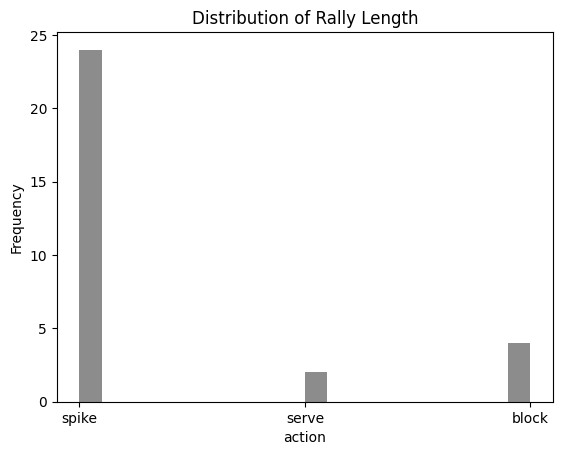

In [ ]:
# Step 1. 랠리의 분포 분석
import matplotlib.pyplot as plt

# 랠리 길이 분포 시각화
plt.hist(set5_play['action'], bins=20, color='grey', alpha=0.9)
plt.xlabel('action')
plt.ylabel('Frequency')
plt.title('Distribution of Rally')
plt.show()

In [ ]:
# Step2. 특정 포지션 또는 선수의 성과 분석
# 'spike' 액션만 필터링
spike_actions = set5_play[set5_play['action'] == 'spike']

# 'kor' 팀에서 'spike'를 가장 많이 한 선수 찾기
kor_spike_actions = spike_actions[spike_actions['action_team'] == 'kor']
kor_spike_counts = kor_spike_actions['player_no'].value_counts()
most_kor_spike_player = kor_spike_counts.idxmax()
most_kor_spike_count = kor_spike_counts.max()

# 'jpn' 팀에서 'spike'를 가장 많이 한 선수 찾기
jpn_spike_actions = spike_actions[spike_actions['action_team'] == 'jpn']
jpn_spike_counts = jpn_spike_actions['player_no'].value_counts()
most_jpn_spike_player = jpn_spike_counts.idxmax()
most_jpn_spike_count = jpn_spike_counts.max()

print("스파이크 빈도 1위(한국팀): 선수 번호", most_kor_spike_player, "횟수", most_kor_spike_count)
print("스파이크 빈도 1위(일본팀): 선수 번호", most_jpn_spike_player, "횟수", most_jpn_spike_count)


스파이크 빈도 1위(한국팀): 선수 번호 13 횟수 6
스파이크 빈도 1위(일본팀): 선수 번호 2 횟수 5


In [ ]:
# 스파이크 빈도 1위(한국팀) 선수정보 #
first_spiker_kor = kor_team[kor_team['player_no'] == 13]
print("한국팀 13번 선수정보:")
print(first_spiker_kor)

# 스파이크 빈도 1위(한국팀) 선수정보
first_spiker_jpn = jpn_team[jpn_team['player_no'] == 2]
print("일본팀 2번 선수정보:")
print(first_spiker_jpn)

## 둘다 Outside Hitter 이다.

한국팀 13번 선수:
   player_no   player_name    shirt_name        position   hand  height  \
8       13.0  PARK Jeongah  PARK JEONGAH  Outside Hitter  Right   187.0   

   highest_reach_spike  highest_reach_block date_of_birth  
8                291.0                276.0    1993-03-26  
일본팀 2번 선수:
   player_no  player_name shirt_name        position   hand  height  \
1        2.0  KOGA Sarina       KOGA  Outside Hitter  Right   180.0   

   highest_reach_spike  highest_reach_block date_of_birth  
1                307.0                290.0    1996-05-21  


In [ ]:
# Step 3. 두 선수의 스파이크 성공률 비교

# 한국팀 13번 선수의 spike
kor_13_spike_count = len(set5_play[(set5_play['point_team'] == 'kor') & (set5_play['player_no'] == 13) & (set5_play['action'] == 'spike')])
kor_13_point_count = len(set5_play[(set5_play['point_team'] == 'kor') & (set5_play['player_no'] == 13) & (set5_play['action'] == 'spike') & (set5_play['point_error'] == 'point')])

# 일본팀 2번 선수의 spike
jpn_2_spike_count = len(set5_play[(set5_play['point_team'] == 'jpn') & (set5_play['player_no'] == 2) & (set5_play['action'] == 'spike')])
jpn_2_point_count = len(set5_play[(set5_play['point_team'] == 'jpn') & (set5_play['player_no'] == 2) & (set5_play['action'] == 'spike') & (set5_play['point_error'] == 'point')])

# 한국팀 13번 선수와 일본팀 2번 선수의 성공률 계산
kor_13_success_rate = (kor_13_point_count / kor_13_spike_count) * 100
jpn_2_success_rate = (jpn_2_point_count / jpn_2_spike_count) * 100

print("한국팀 13번 선수의 성공률은 {:.2f}% 입니다.".format(kor_13_success_rate))
print("일본팀 2번 선수의 성공률은 {:.2f}% 입니다.".format(jpn_2_success_rate))



한국팀 13번 선수의 성공률은 100.00% 입니다.
일본팀 2번 선수의 성공률은 100.00% 입니다.


---
*판다스에서 제공하는 데이터셋과 데이터리안에서 제공하는 문제풀이를 활용하였습니다.*
<br> `#데이터리안` `#판다스공부`